In [1]:
import numpy as np
np.random.seed(0)
X = np.random.uniform(0, 10, 100)[:, np.newaxis]
y = 2*X**2 + 3*X + 5 + np.random.normal(0, 5, size=(100,1))


In [2]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42
)


In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_errors = []
test_errors = []
degrees = [1, 3, 5, 9]

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    model = LinearRegression().fit(X_poly_train, y_train)


    train_pred = model.predict(X_poly_train)
    test_pred  = model.predict(X_poly_test)


    train_errors.append(mean_squared_error(y_train, train_pred))
    test_errors.append(mean_squared_error(y_test, test_pred))

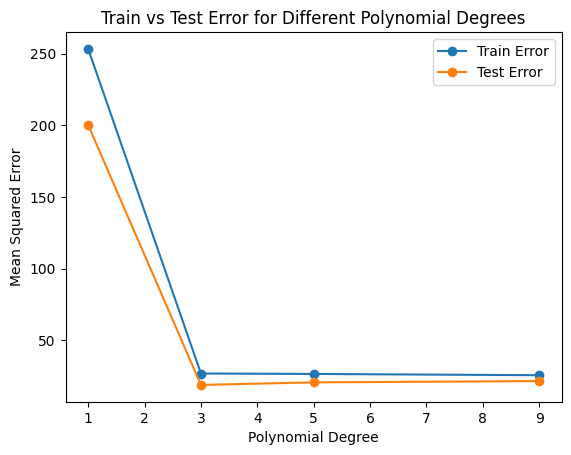

In [6]:
import matplotlib.pyplot as plt

plt.plot(degrees, train_errors, marker='o', label='Train Error')
plt.plot(degrees, test_errors, marker='o', label='Test Error')
plt.title("Train vs Test Error for Different Polynomial Degrees")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

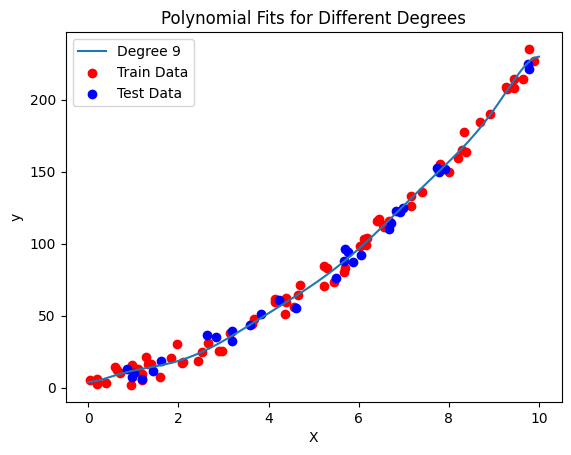

In [9]:
X_fit = np.linspace(0, 10, 100)[:, np.newaxis]
for d in degrees:
    		poly = PolynomialFeatures(degree=d)
X_poly_fit = poly.fit_transform(X_fit)
model = LinearRegression().fit(poly.fit_transform(X_train), y_train)
y_fit = model.predict(X_poly_fit)
plt.plot(X_fit, y_fit, label=f'Degree {d}')

plt.scatter(X_train, y_train, color='red', label='Train Data')
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.title("Polynomial Fits for Different Degrees")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
